<a href="https://colab.research.google.com/github/kathy18/ia/blob/main/reconocimiento_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
%load_ext tensorboard


In [3]:
dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
(_, ANCHO_IMAGEN, ALTURA_IMAGEN) = x_train.shape
CHANNELS = 1

# print('ancho:', ANCHO_IMAGEN);
# print('alto:', ALTURA_IMAGEN);
# print('channels:', CHANNELS);

x_train_with_chanels = x_train.reshape( x_train.shape[0], ANCHO_IMAGEN, ALTURA_IMAGEN, CHANNELS )
x_test_with_chanels = x_test.reshape( x_test.shape[0], ANCHO_IMAGEN, ALTURA_IMAGEN, CHANNELS )



In [5]:
#NORMALIZAR DATOS
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [6]:
modelo = tf.keras.models.Sequential()

modelo.add(tf.keras.layers.Convolution2D(   input_shape=(ANCHO_IMAGEN, ALTURA_IMAGEN, CHANNELS),
                                            kernel_size=5,
                                            filters=8,
                                            strides=1,
                                            activation=tf.keras.activations.relu,
                                            kernel_initializer=tf.keras.initializers.VarianceScaling() ))

modelo.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                        strides=(2, 2) ))

modelo.add(tf.keras.layers.Convolution2D(   kernel_size=5,
                                            filters=16,
                                            strides=1,
                                            activation=tf.keras.activations.relu,
                                            kernel_initializer=tf.keras.initializers.VarianceScaling() ))

modelo.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                        strides=(2, 2) ))

modelo.add(tf.keras.layers.Flatten())

modelo.add(tf.keras.layers.Dense(units=128,
                                 activation=tf.keras.activations.relu ));

modelo.add(tf.keras.layers.Dropout(0.2))

modelo.add(tf.keras.layers.Dense(   units=10,
                                    activation=tf.keras.activations.softmax,
                                    kernel_initializer=tf.keras.initializers.VarianceScaling() ))

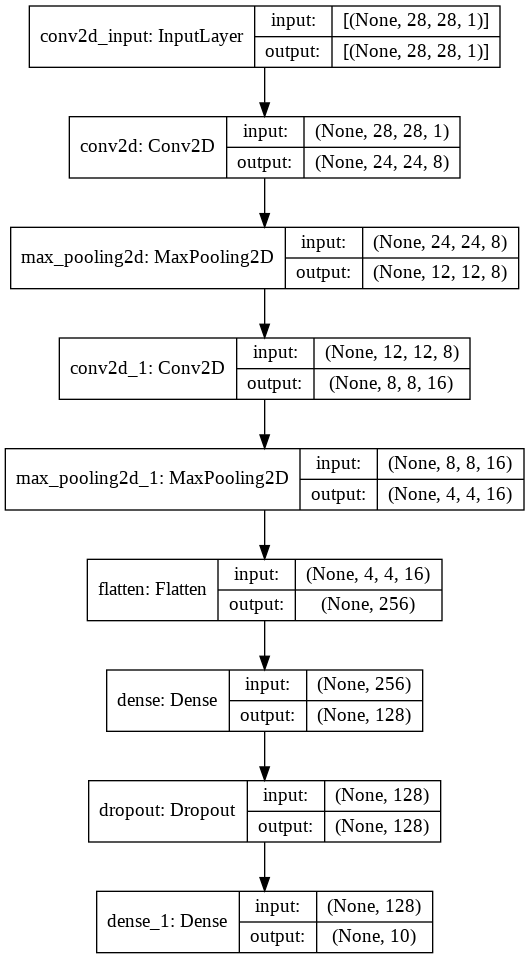

In [7]:
tf.keras.utils.plot_model(
                            modelo,
                            show_shapes=True,
                            show_layer_names=True, )

In [8]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

modelo.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [9]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = modelo.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1987 - accuracy: 0.9377 - val_loss: 0.0580 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0696 - accuracy: 0.9786 - val_loss: 0.0538 - val_accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0514 - accuracy: 0.9841 - val_loss: 0.0432 - val_accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.0333 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0290 - val_accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0402 - val_accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0318 -

In [10]:
train = modelo.evaluate(x_train_normalized, y_train)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0078 - accuracy: 0.9975


In [11]:
print('PRECISION FINAL: ', train[1])

PRECISION FINAL:  0.9974833130836487


In [12]:
predict = modelo.predict([x_test_normalized])

In [13]:
predictions = np.argmax(predictions_one_hot, axis=1)

NameError: ignored

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()